<a href="https://colab.research.google.com/github/Aakankshavr/MachineLearning/blob/main/1BM22CS001_Lab10_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file created: income.csv


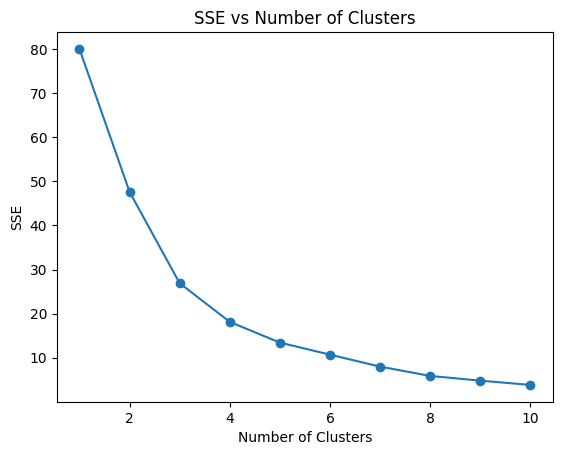

Predicted clusters for test data:
[2 1 0 2 1 2 1 0 0 0]


In [1]:
import pandas as pd
import random
import string

# Generate random data
def random_name():
    return ''.join(random.choices(string.ascii_uppercase, k=5))

data = []
for _ in range(50):
    name = random_name()
    age = random.randint(20, 60)
    income = random.randint(25000, 120000)
    data.append([name, age, income])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Name", "Age", "Income"])

# Save to CSV
df.to_csv("income.csv", index=False)
print("CSV file created: income.csv")

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the CSV data
df = pd.read_csv("income.csv")

# Extract features (Age and Income) for clustering
X = df[["Age", "Income"]]

# Split the data into 80% training and 20% testing
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Perform scaling (standardize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the optimal number of clusters (using the SSE)
sse = []
k_range = range(1, 11)  # Try from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE vs number of clusters
plt.plot(k_range, sse, marker='o')
plt.title('SSE vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Choose the optimal number of clusters (e.g., from the plot, say 3 clusters)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit the KMeans model on the training data
kmeans.fit(X_train_scaled)

# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test_scaled)

# Assuming we use the clusters as 'labels' for accuracy score (this is not a typical "accuracy score" for unsupervised learning, but we're using it to check clustering quality)
# Since we don't have true labels, you could potentially assess the clustering quality using metrics like silhouette score or a domain-specific approach.
# However, for simplicity, we'll just print the predicted clusters for this case.

print("Predicted clusters for test data:")
print(y_pred)
